# **Introduction: Weather Classification with Machine Learning**

Weather impacts nearly every aspect of our daily life, from agriculture and supply chains, to travel and financial markets. In this project, our group set out to build a machine learning classification system to predict weather types: **Rainy, Cloudy, Sunny, or Snowy**. While weather forecasting is typically handled by meteorological models, our goal was to explore how well standard classification algorithms could categorize weather based on a labeled dataset of weather features.

This task has real-world implications. Accurate weather classification can guide seasonal crop decisions, inform emergency planning, and even drive financial forecasting. One example is hedge funds have begun hiring meteorologists to anticipate shifts in commodity markets (like soybean or corn futures). Because of its broad impact and practical relevance, weather classification was a natural choice for our group.

Our goals in this project were to:
- Compare multiple **baseline classification models** to identify the most effective ones.
- Use **GridSearchCV** to optimize hyperparameters for each model.
- Select the top two performing models and **combine them into an ensemble** to create the most accurate final classifier.

By the end, we aimed to answer the question:  
- **“Which machine learning model, or combination of models, performs best for weather type classification on a balanced dataset?”**

# **About the Data**

The dataset used in this project is titled [**Weather Type Classification**](https://www.kaggle.com/datasets/nikhil7280/weather-type-classification/data) and was sourced from Kaggle. It contains **13,200 rows** of synthetically generated weather data and is designed specifically for practicing classification tasks in machine learning. The target variable (**Weather Type**), includes four classes: **Rainy, Sunny, Cloudy, and Snowy**, with the data being perfectly balanced among them.

The dataset includes a mix of numerical and categorical features that describe environmental conditions.

- **Temperature** (°C): Ranges from extreme cold to extreme heat.
- **Humidity** (%): Includes values above 100% to simulate outliers.
- **Wind Speed** (km/h): Includes some unrealistically high values to test robustness.
- **Precipitation** (%): Represents rainfall likelihood, with outliers included.
- **Cloud Cover**: A categorical variable describing cloud conditions.
- **Atmospheric Pressure** (hPa): Varies across a wide range.
- **UV Index**: Indicates ultraviolet radiation strength.
- **Season**: Categorical (Winter, Spring, Summer, Autumn).
- **Visibility** (km): Includes very low and high values.
- **Location**: Categorical (inland, mountain, or coastal).
- **Weather Type**: The target class (Rainy, Cloudy, Sunny, Snowy).

This dataset was designed for educational purposes and includes intentional outliers to help learners practice preprocessing, outlier handling, and classification. Although the data does not reflect real world meteorological records, it serves as a valuable resource for evaluating the performance of machine learning models in a controlled, balanced environment.

# **Understanding the data**

In [ ]:
import pandas as pd

weatherDF = pd.read_csv('weather_classification_data.csv')
weatherDF

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [ ]:
weatherDF.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [ ]:
weatherDF.isna().any()

,0
Temperature,False
Humidity,False
Wind Speed,False
Precipitation (%),False
Cloud Cover,False
Atmospheric Pressure,False
UV Index,False
Season,False
Visibility (km),False
Location,False


# **Methods (Preprocessing the Data)**

Before performing any analysis or modeling, we need to ensure the data is clean and usable. To prepare the dataset for machine learning, we will perform basic label encoding on the categorical variables. This step was necessary to convert string based categories into numerical format for compatibility with classification algorithms.

After preprocessing, the dataset remained **perfectly balanced**, with 3,300 examples for each of the four weather classes, ensuring a fair evaluation across all models without the need for resampling techniques.


In [ ]:
weatherDF.dtypes

,0
Temperature,float64
Humidity,int64
Wind Speed,float64
Precipitation (%),float64
Cloud Cover,object
Atmospheric Pressure,float64
UV Index,int64
Season,object
Visibility (km),float64
Location,object


In [ ]:
print(weatherDF['Cloud Cover'].unique())
print(weatherDF['Season'].unique())
print(weatherDF['Location'].unique())
print(weatherDF['Weather Type'].unique())

['partly cloudy' 'clear' 'overcast' 'cloudy']
['Winter' 'Spring' 'Summer' 'Autumn']
['inland' 'mountain' 'coastal']
['Rainy' 'Cloudy' 'Sunny' 'Snowy']


In [ ]:
weatherDF['Cloud Cover'] = weatherDF['Cloud Cover'].replace({'partly cloudy': 1, 'clear': 0, 'overcast': 2, 'cloudy': 3})
weatherDF['Season'] = weatherDF['Season'].replace({'Winter': 1, 'Spring': 0, 'Summer' : 2, 'Autumn' : 3})
weatherDF['Location'] = weatherDF['Location'].replace({'inland': 1, 'mountain': 0, 'coastal': 2})
weatherDF['Weather Type'] = weatherDF['Weather Type'].replace({'Rainy': 1, 'Cloudy': 0, 'Sunny': 2, 'Snowy': 3})
print(weatherDF['Cloud Cover'].unique())
print(weatherDF['Season'].unique())
print(weatherDF['Location'].unique())
print(weatherDF['Weather Type'].unique())

[1 0 2 3]
[1 0 2 3]
[1 0 2]
[1 0 2 3]


<ipython-input-23-7550e9c281f0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weatherDF['Cloud Cover'] = weatherDF['Cloud Cover'].replace({'partly cloudy': 1, 'clear': 0, 'overcast': 2, 'cloudy': 3})
<ipython-input-23-7550e9c281f0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weatherDF['Season'] = weatherDF['Season'].replace({'Winter': 1, 'Spring': 0, 'Summer' : 2, 'Autumn' : 3})
<ipython-input-23-7550e9c281f0>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To reta

In [ ]:
weatherDF.dtypes

,0
Temperature,float64
Humidity,int64
Wind Speed,float64
Precipitation (%),float64
Cloud Cover,int64
Atmospheric Pressure,float64
UV Index,int64
Season,int64
Visibility (km),float64
Location,int64


In [ ]:
weatherDF

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,1,1010.82,2,1,3.5,1,1
1,39.0,96,8.5,71.0,1,1011.43,7,0,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,0,5.5,0,2
3,38.0,83,1.5,82.0,0,1026.25,7,0,1.0,2,2
4,27.0,74,17.0,66.0,2,990.67,1,1,2.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,0,1
13196,-1.0,76,3.5,23.0,3,1067.23,1,1,6.0,2,3
13197,30.0,77,5.5,28.0,2,1012.69,3,3,9.0,2,0
13198,3.0,76,10.0,94.0,2,984.27,0,1,2.0,1,3


# **Data Visualizations**

<Axes: >

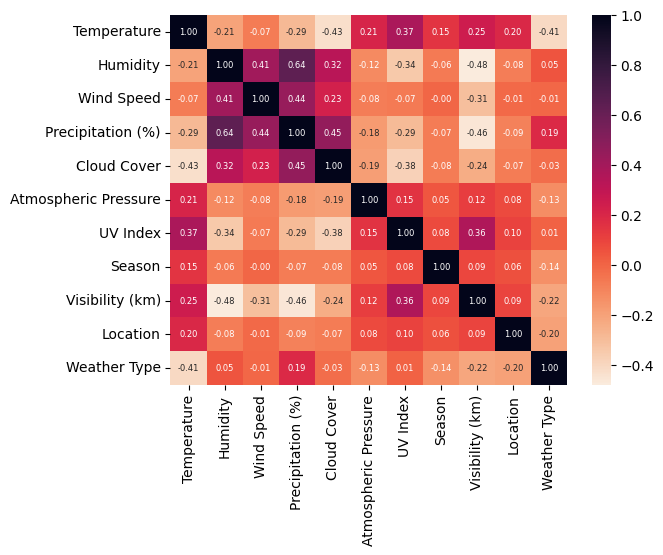

In [ ]:
import seaborn as sns
sns.heatmap(weatherDF.corr(), annot=True, cmap='rocket_r', fmt='.2f', annot_kws={"size": 6})

(array([3300.,    0.,    0., 3300.,    0.,    0., 3300.,    0.,    0.,
        3300.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

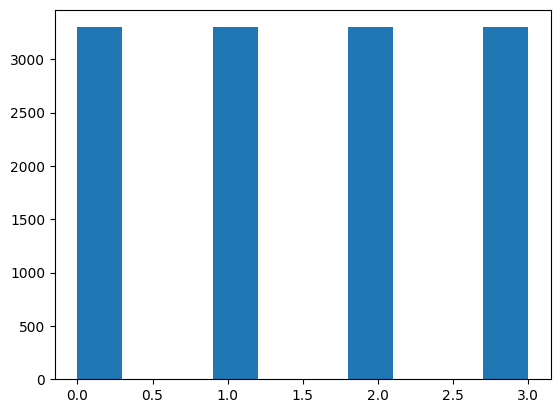

In [ ]:
import matplotlib.pyplot as plt
plt.hist(weatherDF['Weather Type'])

# **Spliting Data**

We will need to split our data into train and testing using the train_test_split function so the model to pick up trends and make predictions. Our data will contain everthing from the dataset, except for the last column which is our target value ('Weather Type'). The parameter 'test_size' wil be set to 0.20 so we can have a 80/20 split for our traing and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

otherFeatures = weatherDF.iloc[:, :-1]
target = weatherDF['Weather Type']

X_train, X_test, t_train, t_test = train_test_split(otherFeatures, target, test_size=0.2, random_state=0)

print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(t_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(t_test.shape))

Train data shape: (10560, 10)
Train target shape: (10560,)
Test data shape: (2640, 10)
Test target shape: (2640,)


# **Methods (Model Pipeline Overview)**
Our models will be trained in this pipeline structure:

1. **Train Baseline Models**: We implemented six classification models using no parameters:
  - Gaussian Naive Bayes  
  - Random Forest  
  - Logistic Regression  
  - LightGBM  
  - Support Vector Machine (SVM)  
  - K-Nearest Neighbors (KNN)  

2. **Evaluate Baselines**: Each model was evaluated using a custom evaluation function that outputs training/test accuracy, classification reports, and a confusion matrix heatmap.

3. **Tune Models with GridSearchCV**: We used GridSearchCV to optimize each model's hyperparameters and evaluated them using the same function for consistency.

4. **Select Top 2 Models**: Based on test performance, top-performing models will be selected for final step.

5. **Final Ensemble**: We created a soft-voting ensemble using VotingClassifier to combine the top 2 models into a single, robust classifier.


# **Evaluation Function**

To avoid repeating code, we created a reusable function that prints the Accuracy Scores, Classification Report, and Confusion Matrix Heatmap for any trained model. This makes it easier to compare multiple models and their performance in a consistent way.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, t_train, X_test, t_test):

    # Calculate and print accuracy scores
    train_score = model.score(X_train, t_train)
    test_score = model.score(X_test, t_test)
    print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}\n")

    # Predict and print classification report
    y_pred = model.predict(X_test)
    print(classification_report(t_test, y_pred))

    # Confusion matrix heatmap
    cm = confusion_matrix(t_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt = 'd')
    plt.xlabel('Predicted')
    plt.ylabel('True Values')
    plt.show()

# **Model 1: GaussianNB**

Train Accuracy: 0.8682765151515152
Test Accuracy: 0.8765151515151515

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       659
           1       0.84      0.86      0.85       682
           2       0.87      0.91      0.89       635
           3       0.92      0.92      0.92       664

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.88      0.88      0.88      2640



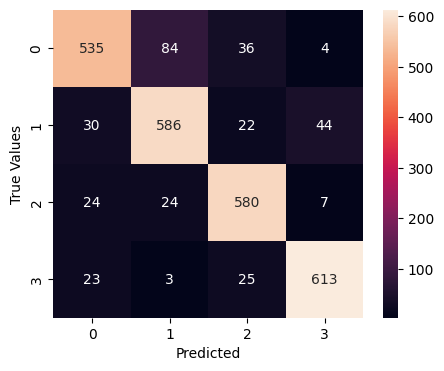

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, t_train)

evaluate_model(nb_model, X_train, t_train, X_test, t_test)

# **Parameter Tuning - GaussianNB Model**

The GaussianNB model has only one main hyperparameter to tune. I used GridSearchCV to search over the following parameter:

- **var_smoothing** – Portion of the largest variance of all features added to variances for stability.

{'var_smoothing': 1e-09}
Train Accuracy: 0.8682765151515152
Test Accuracy: 0.8765151515151515

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       659
           1       0.84      0.86      0.85       682
           2       0.87      0.91      0.89       635
           3       0.92      0.92      0.92       664

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.88      0.88      0.88      2640



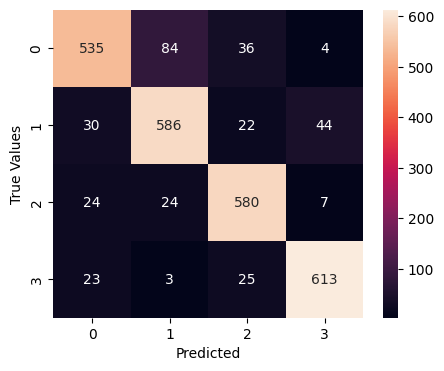

In [ ]:
from sklearn.model_selection import GridSearchCV

hyper_parameters = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

gridSearch = GridSearchCV(nb_model, hyper_parameters, scoring = 'accuracy')
gridSearch.fit(X_train, t_train)

print(gridSearch.best_params_)
nb_tuned = GaussianNB(**gridSearch.best_params_)
nb_tuned.fit(X_train, t_train)

evaluate_model(nb_tuned, X_train, t_train, X_test, t_test)

# **Model 2: Random Forest**


Train Accuracy: 1.0
Test Accuracy: 0.9215909090909091

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       659
           1       0.91      0.93      0.92       682
           2       0.92      0.92      0.92       635
           3       0.95      0.93      0.94       664

    accuracy                           0.92      2640
   macro avg       0.92      0.92      0.92      2640
weighted avg       0.92      0.92      0.92      2640



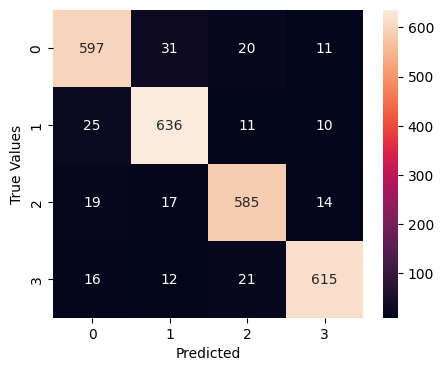

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, t_train)

evaluate_model(rf_model, X_train, t_train, X_test, t_test)

# **Parameter Tuning - Random Forest Model**

The RandomForestClassifier offers many hyperparameters that affect both performance and overfitting. I used GridSearchCV to search over the following parameters:

- **max_depth** – Maximum depth of each tree.
- **min_samples_leaf** – Minimum samples required at a leaf node.
- **max_leaf_nodes** – Maximum number of leaf nodes per tree.

{'max_depth': 15, 'max_leaf_nodes': 50, 'min_samples_leaf': 2}
Train Accuracy: 0.9418560606060606
Test Accuracy: 0.9227272727272727

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       659
           1       0.90      0.93      0.92       682
           2       0.92      0.92      0.92       635
           3       0.98      0.92      0.95       664

    accuracy                           0.92      2640
   macro avg       0.92      0.92      0.92      2640
weighted avg       0.92      0.92      0.92      2640



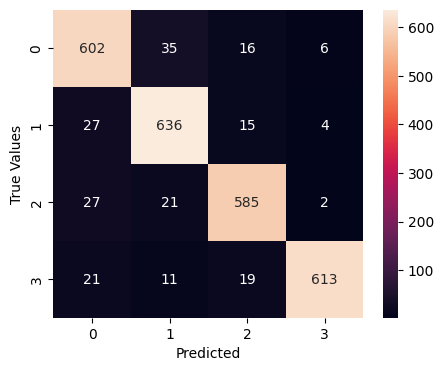

In [ ]:
from sklearn.model_selection import GridSearchCV

hyper_parameters = {
  "max_depth": [5, 10, 15],
  "min_samples_leaf": [1, 2],
  "max_leaf_nodes": [10, 30, 50]
}

gridSearch = GridSearchCV(rf_model, hyper_parameters, scoring = 'accuracy')
gridSearch.fit(X_train, t_train)
print(gridSearch.best_params_)

rf_tuned = RandomForestClassifier(**gridSearch.best_params_)
rf_tuned.fit(X_train, t_train)

evaluate_model(rf_tuned, X_train, t_train, X_test, t_test)

# **Model 3: Logistic Regression**

Train Accuracy: 0.8515151515151516
Test Accuracy: 0.856439393939394

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       659
           1       0.84      0.84      0.84       682
           2       0.87      0.88      0.87       635
           3       0.88      0.93      0.90       664

    accuracy                           0.86      2640
   macro avg       0.86      0.86      0.86      2640
weighted avg       0.86      0.86      0.86      2640



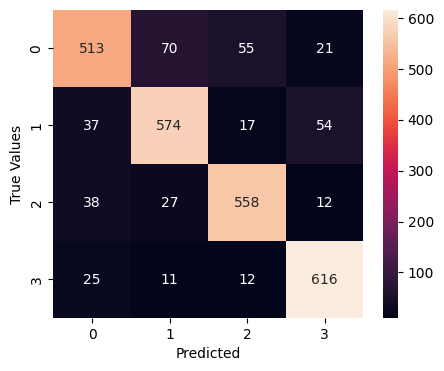

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, t_train)

evaluate_model(lr_model, X_train, t_train, X_test, t_test)

# **Parameter Tuning – Logistic Regression**

The LogisticRegression model only has few hyperparamters we can tune, and we explicitly used solver='liblinear' to enable tuning both L1 and L2 regularization penalties via GridSearchCV.

- **C** – Inverse of regularization strength. Smaller values specify stronger regularization.
- **penalty** – The norm used in the penalization.





/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'C': 0.01, 'penalty': 'l1'}
Train Accuracy: 0.8521780303030303
Test Accuracy: 0.8583333333333333

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       659
           1       0.84      0.86      0.85       682
           2       0.87      0.87      0.87       635
           3       0.88      0.93      0.90       664

    accuracy                           0.86      2640
   macro avg       0.86      0.86      0.86      2640
weighted avg       0.86      0.86      0.86      2640



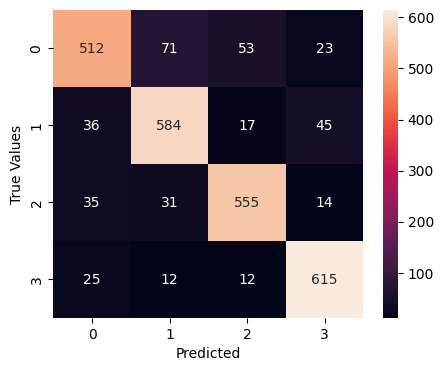

In [ ]:
from sklearn.model_selection import GridSearchCV

hyper_parameters = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
}

gridSearch = GridSearchCV(lr_model, hyper_parameters, scoring='accuracy')
gridSearch.fit(X_train, t_train)

print(gridSearch.best_params_)
lr_tuned = LogisticRegression(**gridSearch.best_params_, solver='liblinear')
lr_tuned.fit(X_train, t_train)

evaluate_model(lr_tuned, X_train, t_train, X_test, t_test)

# **Model 4: LightGBM**

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 723
[LightGBM] [Info] Number of data points in the train set: 10560, number of used features: 10
[LightGBM] [Info] Start training from score -1.385916
[LightGBM] [Info] Start training from score -1.394663
[LightGBM] [Info] Start training from score -1.376869
[LightGBM] [Info] Start training from score -1.387811
Train Accuracy: 0.9997159090909091
Test Accuracy: 0.921969696969697

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       659
           1       0.90      0.92      0.91       682
           2       0.92      0.94      0.93       635
           3       0.95      0.94      0.94       664

    accurac

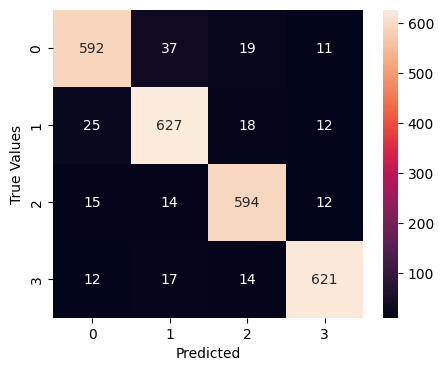

In [ ]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier()
lgb_model.fit(X_train, t_train)

evaluate_model(lgb_model, X_train, t_train, X_test, t_test)

# **Parameter Tuning – LightGBM**

LightGBM is a gradient boosting framework that allows for efficient training and high accuracy. We decided to tune these key hyperparameters:

- **num_leaves** – The maximum number of leaves per tree. Higher values can improve learning capacity but increase risk of overfitting.
- **learning_rate** – Controls how much the model adjusts weights with each boosting step.
- **n_estimators** – The number of boosting rounds (trees). More estimators allow the model to learn more patterns but increase training time.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 720
[LightGBM] [Info] Number of data points in the train set: 8448, number of used features: 10
[LightGBM] [Info] Start training from score -1.385821
[LightGBM] [Info] Start training from score -1.394376
[LightGBM] [Info] Start training from score -1.376869
[LightGBM] [Info] Start training from score -1.388190
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 716
[LightGBM] [In

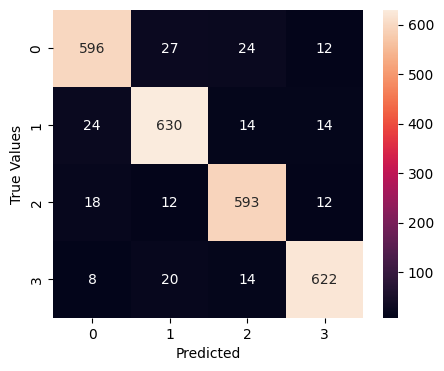

In [ ]:
from sklearn.model_selection import GridSearchCV

hyper_parameters = {
    'num_leaves': [20, 31],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

grid_search = GridSearchCV(lgb_model, hyper_parameters, scoring='accuracy')
grid_search.fit(X_train, t_train)
print(grid_search.best_params_)

lgb_tuned = LGBMClassifier(**grid_search.best_params_)
lgb_tuned.fit(X_train, t_train)

evaluate_model(lgb_tuned, X_train, t_train, X_test, t_test)

# **Model 5: SVM**

Train Accuracy: 0.8240530303030303
Test Accuracy: 0.8378787878787879

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       659
           1       0.76      0.88      0.81       682
           2       0.85      0.77      0.81       635
           3       0.90      0.95      0.92       664

    accuracy                           0.84      2640
   macro avg       0.84      0.84      0.84      2640
weighted avg       0.84      0.84      0.84      2640



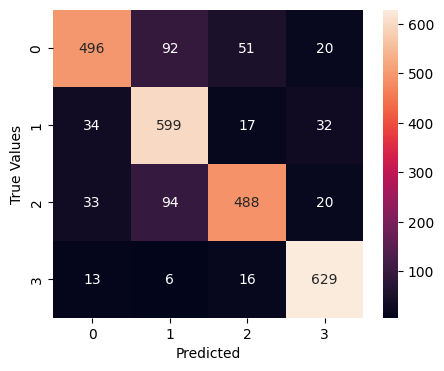

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, t_train)

evaluate_model(svm_model, X_train, t_train, X_test, t_test)

# **Parameter Tuning - SVM**

The Support Vector Model offers many hyperparameters that affect both performance and overfitting. I used GridSearchCV to search over the following parameters:

- **Kernel** – The type of kernel we are using to make a hyperplane of the data to a higher-dimensional space.
- **Gamma** – How much curvature we want in a decision boundary.
- **C** – How much error we are allowing the model to have.

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Train Accuracy: 0.98125
Test Accuracy: 0.915530303030303

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       659
           1       0.90      0.93      0.91       682
           2       0.92      0.93      0.92       635
           3       0.96      0.93      0.95       664

    accuracy                           0.92      2640
   macro avg       0.92      0.92      0.92      2640
weighted avg       0.92      0.92      0.92      2640



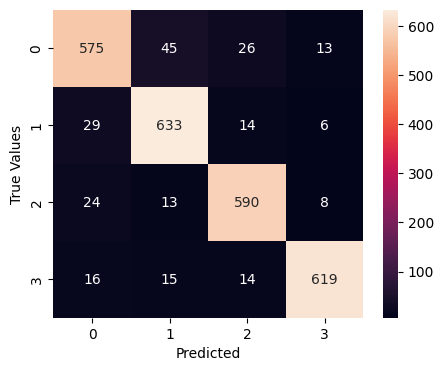

In [ ]:
from sklearn.model_selection import GridSearchCV

hyper_parameters = {
    'C': [0.1, 0.5, 1, 5, 7, 10],
    'gamma': [1, 0.1, 0.01, 0.005, 0.001, 0.0005, 5, 10],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(svm_model, hyper_parameters, scoring = 'accuracy')
grid_search.fit(X_train, t_train)
print(grid_search.best_params_)

svm_tuned = SVC(**grid_search.best_params_)
svm_tuned.fit(X_train, t_train)

evaluate_model(svm_tuned, X_train, t_train, X_test, t_test)

# **Model 6: KNN**

Train Accuracy: 0.921875
Test Accuracy: 0.8954545454545455

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       659
           1       0.85      0.90      0.88       682
           2       0.91      0.91      0.91       635
           3       0.96      0.92      0.94       664

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



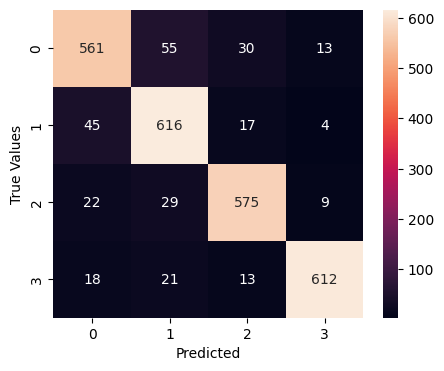

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, t_train)

evaluate_model(knn_model, X_train, t_train, X_test, t_test)

# **Parameter Tuning - KNN**

The K-Nearest Neighbor models has a few hyper parameters that I am able to evaluate.

- **n_neighbors** - Determines the number of neighbors the model will look at before continuing.
- **weights** - Dictates how the amount of neighbors determines the predictions. With 'uniform' having all a single weight and 'distance' having weight change based on number of neighbors.
- **metric** - Set the method on how distance is between neighbors is calculated. With 'euclidean' being more linear and 'manhattan' being more grid like.


{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Train Accuracy: 0.9242424242424242
Test Accuracy: 0.9007575757575758

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       659
           1       0.86      0.92      0.89       682
           2       0.91      0.91      0.91       635
           3       0.96      0.92      0.94       664

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



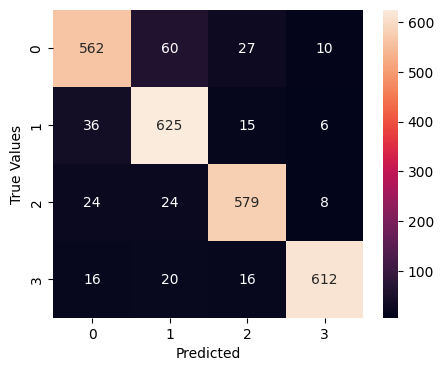

In [ ]:
from sklearn.model_selection import GridSearchCV

hyper_parameters = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

gridSearch = GridSearchCV(knn_model, hyper_parameters, scoring='accuracy')
gridSearch.fit(X_train, t_train)
print(gridSearch.best_params_)

knn_tuned = KNeighborsClassifier(**gridSearch.best_params_)
knn_tuned.fit(X_train, t_train)

evaluate_model(knn_tuned, X_train, t_train, X_test, t_test)

# **Voting Model with Top 2 Models**

Below are the results of evaluating test accuracy on all 6 tuned models:
- **87.65 %** Gaussian Naive Bayes
- **92.27 %** Random Forest
- **85.83 %** Logistic Regression
- **92.46 %** LightGBM
- **91.55 %** Support Vector Machine (SVM)
- **90.08 %** K-Nearest Neighbors (KNN)

After evaluating the models based on their accuracy, classification reports, and confusion matrix heatmaps, we selected **LightGBM** and **Random Forest** as the top two models.

Next, we combined the tuned LightGBM and Random Forest models using a **VotingClassifier** to create the best overall model.  
We used voting='soft' because both models support probability outputs (predict_proba), and soft voting generally provides smoother, more accurate final predictions by averaging class probabilities rather than taking a majority vote.

Below is the final code and evaluation:


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 723
[LightGBM] [Info] Number of data points in the train set: 10560, number of used features: 10
[LightGBM] [Info] Start training from score -1.385916
[LightGBM] [Info] Start training from score -1.394663
[LightGBM] [Info] Start training from score -1.376869
[LightGBM] [Info] Start training from score -1.387811
Train Accuracy: 0.9910984848484848
Test Accuracy: 0.925

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       659
           1       0.91      0.93      0.92       682
           2       0.92      0.93      0.93       635
           3       0.95      0.93      0.94       664

    accuracy           

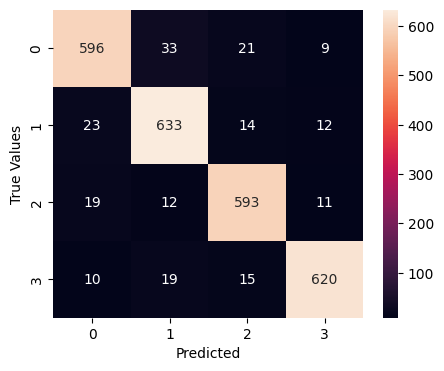

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(
    estimators=[
        ('lgb', lgb_tuned),
        ('rf', rf_tuned)
    ],
    voting='soft'
)

voting_model.fit(X_train, t_train)
y_pred = voting_model.predict(X_test)

evaluate_model(voting_model, X_train, t_train, X_test, t_test)

# **Final Results and Conclusion**

The VotingClassifier combining the tuned **LightGBM** and **Random Forest** models achieved a **test accuracy of 92.5%** on the weather classification task.

The precision, recall, and F1-scores across all four weather classes were consistently high, with an overall **macro and weighted F1-score of 93%**. The confusion matrix shows that the ensemble model predicts each weather category with strong reliability and only minor misclassifications between similar classes.

Overall, combining LightGBM and Random Forest using the ensemble, successfully created a model that is more robust and accurate than either model individually.
